In [ ]:
### !pip install tensorflow-gpu

### Reading the dataset

In [1]:
import tensorflow as tf
print(tf.__version__)


2.15.0


In [2]:
## Importing basic libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
df['RowNumber'].tail()

9995     9996
9996     9997
9997     9998
9998     9999
9999    10000
Name: RowNumber, dtype: int64

In [19]:
### Divide the dataset into independent and dependent features

X = df.iloc[:,3:-1]
y = df.Exited

X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


### Feature Engineering

In [20]:
### Handling categorical variables
cat_cols = X.select_dtypes(include='O').columns

In [21]:
## One hot encoding of cat_cols
cat = pd.get_dummies(X[cat_cols],drop_first=True)
## concatenating the encoded cols
X = pd.concat([X,cat],axis=1)
X.drop(cat_cols,axis=1,inplace=True)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [22]:
X.shape

(10000, 11)

In [23]:
### Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [24]:
## Feature scaling
from sklearn.preprocessing import StandardScaler
scaler  =StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [26]:
X_train_scaled

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

### Creating ANN

In [33]:
import keras
from keras.models import Sequential
from keras.layers import Dense,LeakyReLU,PReLU,ELU,ReLU,Dropout

In [32]:
### Initialize the ANN
classifier = Sequential()

### Adding the input layer
classifier.add(Dense(units= 11,activation='relu'))

### Hidden layer 1
classifier.add(Dense(units=7,activation='relu'))

### Adding 2nd hidden layer
classifier.add(Dense(units=6,activation='relu'))

### Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [34]:
### compiling the model
# classifier.compile(
#                 optimizer='adam',
#                 loss=  'binary_crossentropy',
#                 metrics = ['accuracy'])

In [35]:
### to change the optimizer learning rate value
opt = keras.optimizers.Adam(learning_rate=0.01)

In [36]:
classifier.compile(
              optimizer=opt,
                 loss=  'binary_crossentropy',
                 metrics = ['accuracy'])

In [37]:
### Training the model
history  = classifier.fit(X_train,y_train,
                    validation_split=0.33,batch_size=10,epochs=1000)

Epoch 1/1000


536/536 [==============================] - 6s 7ms/step - loss: 0.7754 - accuracy: 0.7847 - val_loss: 0.5067 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.5005 - accuracy: 0.7962 - val_loss: 0.5012 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 8s 15ms/step - loss: 0.5211 - accuracy: 0.7959 - val_loss: 0.5074 - val_accuracy: 0.7955
Epoch 4/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.5066 - accuracy: 0.7962 - val_loss: 0.5070 - val_accuracy: 0.7955
Epoch 5/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.5064 - accuracy: 0.7962 - val_loss: 0.5068 - val_accuracy: 0.7955
Epoch 6/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.5064 - accuracy: 0.7962 - val_loss: 0.5070 - val_accuracy: 0.7955
Epoch 7/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.5067 - accuracy: 0.7962 - val_loss: 0.5072 - val_accura

154/536 [=======>......................] - ETA: 1s - loss: 0.5138 - accuracy: 0.7903

KeyboardInterrupt: 

In [43]:
### Early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [46]:
### Compiling the model one again
classifier.compile(
              optimizer=opt,
                 loss=  'binary_crossentropy',
                 metrics = ['accuracy'])

In [47]:
## Training the model using early stopping
history  = classifier.fit(X_train,y_train,
                    validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 5s 6ms/step - loss: 0.5060 - accuracy: 0.7962 - val_loss: 0.5065 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.5060 - accuracy: 0.7962 - val_loss: 0.5066 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.5060 - accuracy: 0.7962 - val_loss: 0.5072 - val_accuracy: 0.7955
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.5060 - accuracy: 0.7962 - val_loss: 0.5068 - val_accuracy: 0.7955
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.5058 - accuracy: 0.7962 - val_loss: 0.5071 - val_accuracy: 0.7955
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.5061 - accuracy: 0.7962 - val_loss: 0.5069 - val_accuracy: 0.7955
Epoch 7/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.5062 - accuracy: 0.7962 - val_loss: 0.5068 - val_accuracy:

In [50]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

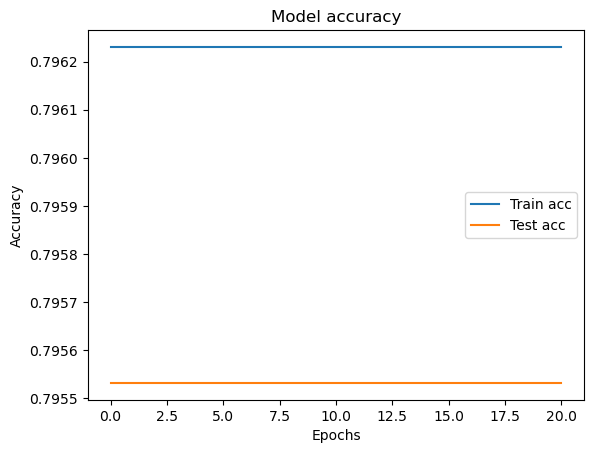

In [53]:
### plotting the train and validation accuracy
plt.plot(range(21),history.history['accuracy'],label='Train acc')
plt.plot(range(21),history.history['val_accuracy'],label='Test acc')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

- We can clearly see that from the starting the accuracy was same and hasn't got even slightly changed a bit.

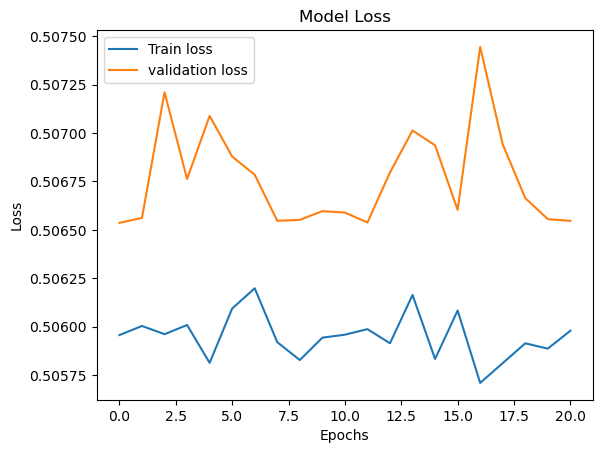

In [55]:
### plotting the train and validation loss
plt.plot(range(21),history.history['loss'],label='Train loss')
plt.plot(range(21),history.history['val_loss'],label='validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

### Making Predictions

In [56]:
y_pred = classifier.predict(X_test)

63/63 [==============================] - 0s 3ms/step


In [58]:
### Let's take the threshold of 0.5 to make the decision as 1
y_pred = (y_pred>=0.5)

In [59]:
### Making the confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm  = confusion_matrix(y_test,y_pred)
cm

array([[1595,    0],
       [ 405,    0]], dtype=int64)

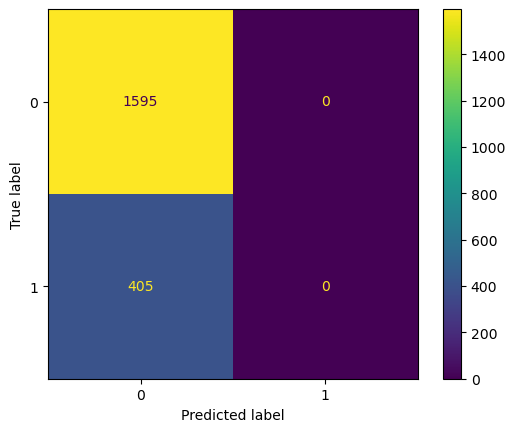

In [63]:
## Display the confusion matrix
ConfusionMatrixDisplay(cm).plot()

In [60]:
### Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
score

0.7975

In [61]:
#### Getting the weights 
classifier.get_weights()

[array([[ 0.19877104,  0.15518044,  0.2288957 , -0.4262453 ,  0.1273256 ,
          0.537972  , -0.45072046,  0.10987978, -0.15147379,  0.2363989 ,
         -0.00181633],
        [ 0.2203349 , -0.305264  ,  0.2861883 ,  0.5138299 ,  0.33934027,
         -0.08491129, -0.27514154, -0.09629716,  0.40552527,  0.2415877 ,
         -0.35962483],
        [ 0.04429611,  0.15151607, -0.49895293,  0.49997228,  0.02078211,
          0.04577911, -0.4063932 ,  0.7056235 ,  0.0527652 ,  0.6452382 ,
          0.50091153],
        [-0.02410966,  0.23828664, -0.31668532, -0.4373578 , -0.41763878,
          0.26114675, -0.05435899,  0.4124173 ,  0.20879325,  0.46185526,
         -0.3675301 ],
        [-0.0420838 ,  0.32554913,  0.07582981,  0.22693163,  0.4414978 ,
          0.41600338, -0.54290277, -0.28363794,  0.20042141, -0.23218895,
          0.43365538],
        [-0.14479889,  0.24139594, -0.18912739, -0.39617264,  0.36786467,
          0.4329104 ,  0.0733121 , -0.00958717, -0.12323397,  0.2541111